<a id='title'/>

# Univariate Time Series Forecasting for Telecom Revenue Forecasting

## Problem Statement

In this lab, we aim to perform univariate time series forecasting for telecom revenue data. The dataset contains daily revenue values for a telecom company over two years. Our goal is to analyze the time series data, identify patterns such as trends and seasonality, and build an ARIMA model to forecast future revenue. The forecasting model will help the telecom company make informed decisions based on predicted revenue trends.

## Tasks to be Performed

1. **Data Exploration:**
    - Load the dataset and create a pandas DataFrame.
    - Visualize the revenue data for Year 1 and Year 2 separately to gain an initial understanding of any noticeable trends or patterns.

2. **Stationarity Analysis:**
    - Examine stationarity by plotting the rolling mean and standard deviation of the observed data to identify any underlying trends.
    - Perform the Augmented Dickey-Fuller (ADF) test to statistically test for stationarity.
    - Apply differencing to the data to achieve stationarity if needed.

3. **Seasonality Analysis:**
    - Create seasonal subseries by grouping the data into different time periods (Year, Quarter, Month, Week) to identify any recurring patterns or seasonality present in the data.
    - Visualize the seasonal subseries to observe seasonality overview.

4. **Autocorrelation Analysis:**
    - Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to examine the correlation between observations and their lags.
    - Use these plots to determine the order of the ARIMA model.

5. **Spectral Density Analysis:**
    - Calculate and plot the spectral density using the periodogram to identify any dominant frequencies or periodicity in the data.

6. **Time Series Decomposition:**
    - Decompose the time series into its components (observed, trend, seasonal, residual) using the `seasonal_decompose` function to gain insights into the underlying trends and seasonality in the data.

7. **ARIMA Modeling:**
    - Use the `auto_arima` function to automatically find the optimal p, d, q values for the ARIMA model.
    - Fit an ARIMA model to the differenced data, utilizing the identified order.
    - Generate forecasts for the last 30 days of the time series using the model.
    - Compare the forecasted values to the test series to assess the model's accuracy, calculating the root mean squared error (RMSE) as a measure of forecast error.

8. **Forecast Prediction Interval:**
    - Select the last 30 days in the time series as the forecast prediction interval.
    - Justify the choice of forecast length based on recent data, seasonality, trends, adaptability, and computational efficiency.

9. **Model Evaluation Procedure:**
    - Split the time series data into a training set and a test set.
    - Fit the ARIMA model using the training data and generate predictions for the test set.
    - Evaluate the model by comparing the predicted values to the actual values in the test set.
    - Calculate the RMSE to quantify the average difference between the predicted and actual values.

10. **Visualization:**
     - Create plots to visualize the forecasted revenue versus the test set.
     - Include confidence intervals in the plots to visualize the uncertainty of the predictions.

11. **Projected Revenue:**
     - Forecast the revenue for the first month of Year 3 using the fitted ARIMA model.
     - Visualize the forecasted revenue along with confidence intervals.
     - Compare the forecasted revenue for January, Year 3, with the observed revenue for January, Year 1 and Year 2.

12. **Summary and Interpretation:**
     - Summarize the findings from the analysis and modeling.
     - Interpret the results and provide insights into the projected revenue for the telecom company.
     - Discuss the potential impact of the forecast on the company's decision-making process.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16,10]
import seaborn as sns
sns.set_palette('colorblind')
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from scipy.signal import periodogram
from scipy.stats import linregress
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error as mse

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Dataset Information

The dataset contains daily revenue values for a telecom company over two years. The data is organized into a pandas DataFrame with 731 entries and 6 columns. Below is the summary of the data:

- **Total Entries:** 731
- **Total Columns:** 6

### Data Types and Memory Usage
- **Day:** int64
- **Revenue:** float64
- **Year:** int64
- **Quarter:** int32
- **Month:** int32
- **Week:** int32

### Memory Usage
- **Total Memory Usage:** 25.8 KB

### Data Summary
### Data Dictionary

| Column   | Description                              | Data Type |
|----------|------------------------------------------|-----------|
| Day      | Day of the observation (1 to 731)        | int64     |
| Revenue  | Daily revenue in millions of dollars     | float64   |
| Year     | Year of the observation (1 or 2)         | int64     |
| Quarter  | Quarter of the year (1 to 4)             | int32     |
| Month    | Month of the year (1 to 12)              | int32     |
| Week     | Week of the year (1 to 52)               | int32     |

In [3]:
# Load the data
df = pd.read_csv('datasets/teleco_revenue_time_series.csv')

In [5]:
# Review data shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.5 KB


### ARIMA (Auto-Regressive Integrated Moving Average) Model: A Detailed Overview

The ARIMA model is a popular and flexible statistical method used for analyzing and forecasting time series data, especially when the data shows evidence of non-stationarity. ARIMA combines three core components: Auto-Regression (AR), Differencing (I - for “Integrated”), and Moving Average (MA) to model and predict data points.

**ARIMA is represented as ARIMA(p, d, q)** where:
- \( p \) is the number of autoregressive terms.
- \( d \) is the number of differencing steps needed to make the series stationary.
- \( q \) is the number of moving average terms.

---



## Auto-Regressive Models - AR(p)
- we forecast the variable of interest using a linear combination of predictors. 

An AR(p) model is denoted by

\begin{align*}
y_{t} = c+ \phi_{1} * y_{t-1} + \phi_{2} * y_{t-2} + .... + \phi_{p} * y_{t-p} + e_{p}
\end{align*}

where  $e_{t}$ is white noise.

#### Now understood why ARIMA assumes stationarity? 
- It because there is a problem of multi-collinearity if the data is non-stationary. 

<b>We will build AR models once the boring and useful theory is done.</b>

## Moving Average Models - MA(q)
- Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

An MA(q) model is denoted by, 

\begin{align*}
y_{t} = c+ \theta_{1} * e_{t-1} + \theta_{2} * e_{t-2} + .... + \theta_{p} * e_{t-q} 
\end{align*}

- Unlike AR here we don't do any Regression. We take the outputs of AR model, measure the errors and model these errors using the above function.

### Number of Differences (d): 
- These are the number of nonseasonal differences to be performed on the data for achieving stationarity

So Finally we model **ARIMA(p, q, d)** and finding out **p, q, d** values is the major task in building models using ARIMA class of models. 

Lets have a look at how this is achieved.

The Integrated (I) component represents the differencing order needed to make the series stationary. Stationarity is a requirement for ARIMA because non-stationary data can lead to unreliable and spurious predictions.

- **Order (d):** Represents the number of differencing steps required to make the series stationary.
- **Differencing:** A method used to remove trends and seasonality in a time series to achieve stationarity. First-order differencing removes linear trends, while second-order differencing removes quadratic trends, and so on.

- **Equation for Differencing:**
  - First-order differencing: \( Y_t = X_t - X_{t-1} \)
  - Second-order differencing: \( Y_t = (X_t - X_{t-1}) - (X_{t-1} - X_{t-2}) \)

Differencing is an essential step in ARIMA because it reduces the potential of high errors from non-stationary data. In telecom applications, differencing helps address seasonality and trends in usage data, network load, and other variables.


### Understanding ARIMA Model Parameters: p, d, q

- **p (AR order):** Specifies the number of lagged values of the series to be used as predictors in the model. High autocorrelation in the PACF plot indicates a significant AR component.
- **d (Differencing order):** Indicates the number of differencing steps to achieve stationarity. Often determined by examining trends or performing the Augmented Dickey-Fuller (ADF) test.
- **q (MA order):** Specifies the number of lagged forecast errors used in the model. High autocorrelation in the ACF plot is a clue that an MA component is required.

In practice, setting these parameters involves evaluating multiple models using combinations of p, d, and q values, and selecting the best model based on criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

---



### Modelling Arima Models using Python
- Inorder to model we have to figure out what values does p q and d takes. From the stationarity test, we have already obsevred that d =1. 
- To find out the values of P & q we need to look at the ACF and PACF plots.

##### Autocorrelation Function (ACF):  (useful to estimate q)
- It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

##### Partial Autocorrelation Function (PACF): (useful to estimate p)
- This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

### Working of the ARIMA Model

1. **Identification:** 
   - Analyze the time series for trends and stationarity.
   - If the series is non-stationary, apply differencing to make it stationary.
   - Use ACF and PACF plots to determine the initial values for \( p \) and \( q \).

2. **Parameter Estimation:**
   - Estimate the AR and MA coefficients using statistical methods like Maximum Likelihood Estimation (MLE).
   - Evaluate the model’s performance using information criteria (AIC, BIC) to find the optimal values of p, d, and q.

3. **Model Diagnostics:**
   - Check the residuals to ensure they are random (white noise).
   - If residuals show patterns, the model may require further refinement, either by adding terms or adjusting the parameters.

4. **Forecasting:**
   - Once the model is tuned and validated, it can be used for forecasting.
   - Forecasting is based on the coefficients and differencing steps identified, allowing predictions for future data points.

---

### ARIMA Model Variants

1. **ARIMA Model:** Combines AR, I, and MA components. Appropriate for data without seasonal patterns.
  
2. **Seasonal ARIMA (SARIMA) Model:** Extends ARIMA to handle seasonality by adding seasonal terms. Represented as SARIMA(p, d, q)(P, D, Q)[s], where:
   - **P, D, Q** are seasonal components for AR, differencing, and MA.
   - **s** is the seasonality period (e.g., s=12 for monthly data with annual seasonality).
  
3. **ARIMA with Exogenous Variables (ARIMAX):** An ARIMA model with additional explanatory variables or exogenous inputs. Often used when external variables (like economic indicators) may influence the time series.

---

### Model Selection and Evaluation

Selecting an appropriate ARIMA model involves comparing models with different parameters and choosing the best based on error metrics or information criteria.

- **Akaike Information Criterion (AIC):** Measures model quality, with lower values indicating a better model.
- **Bayesian Information Criterion (BIC):** Similar to AIC but applies a stronger penalty for complex models. Lower values indicate a better model.
  
- **Residual Analysis:** Analyze residuals to confirm that they are uncorrelated and have a constant variance. This confirms that the ARIMA model captures the patterns in the data well.

### When to Use ARIMA

The ARIMA model is best suited for data that:
- Is stationary or can be made stationary.
- Does not contain strong seasonal patterns (unless SARIMA is used).
- Has trends or non-periodic cycles that need modeling.

---

### Practical Applications of ARIMA

1. **Telecommunications:** Predicting network usage, traffic load, and call volume.
2. **Finance:** Forecasting stock prices, demand, and economic indicators.
3. **Weather Forecasting:** Modeling temperature, rainfall, and other time-dependent climate data.

---




## 2. ARIMA Model Selection

> #### Data Exploration:
Visualize the revenue data for Year 1 and Year 2 separately to gain an initial understanding of any noticeable trends or patterns.

> #### Stationarity Analysis:
Examine stationarity by plotting the rolling mean and standard deviation of the observed data to identify any underlying trends. Check for stationarity by differencing the data.

> #### Seasonality Analysis:
Analyze the seasonal subseries by grouping the data into different time periods (Year, Quarter, Month, Week) to identify any recurring patterns or seasonality present in the data.

> #### Autocorrelation Analysis:
Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to examine the correlation between observations and their lags. Use these plots to determine the order of the ARIMA model.

> #### Spectral Density:
Calculate and plot the spectral density using the periodogram to identify any dominant frequencies or periodicity in the data.

> #### Time Series Decomposition:
Decompose the time series into its components (observed, trend, seasonal) using the seasonal_decompose function to gain insights into the underlying trends and seasonality in the data.

> #### ARIMA Modeling:
Fit an ARIMA model to the differenced data, utilizing the identified order of (1, 1, 0). Generate forecasts for the last 30 days of the time series using the model. Compare the forecasted values to the test series to assess the model's accuracy, calculating the root mean squared error (RMSE) as a measure of forecast error.


---


### 2.1. Data Exploration
> #### Data Visualization: 
> - A pandas Series object, `ts`, is created using the daily revenue values from the DataFrame `df`, with the index set as the 'Day' column. This step is crucial for organizing the data in a time-dependent manner. 
> - The seaborn library's `lineplot` function is used to create two line plots. The first plot represents the revenue data for the first year, while the second plot represents the revenue data for the second year. By plotting the data separately for each year, potential differences or trends between the two periods can be observed. 
> - To emphasize the distinction between the two years, the `fill_between` function from matplotlib is used to shade the areas beneath each line plot. This shading visually separates the two periods, making it easier to compare their revenue trends.

---

In [6]:
# Create a pandas series object from the time-series data
ts = pd.Series(df['Revenue'].values, index=df['Day'])

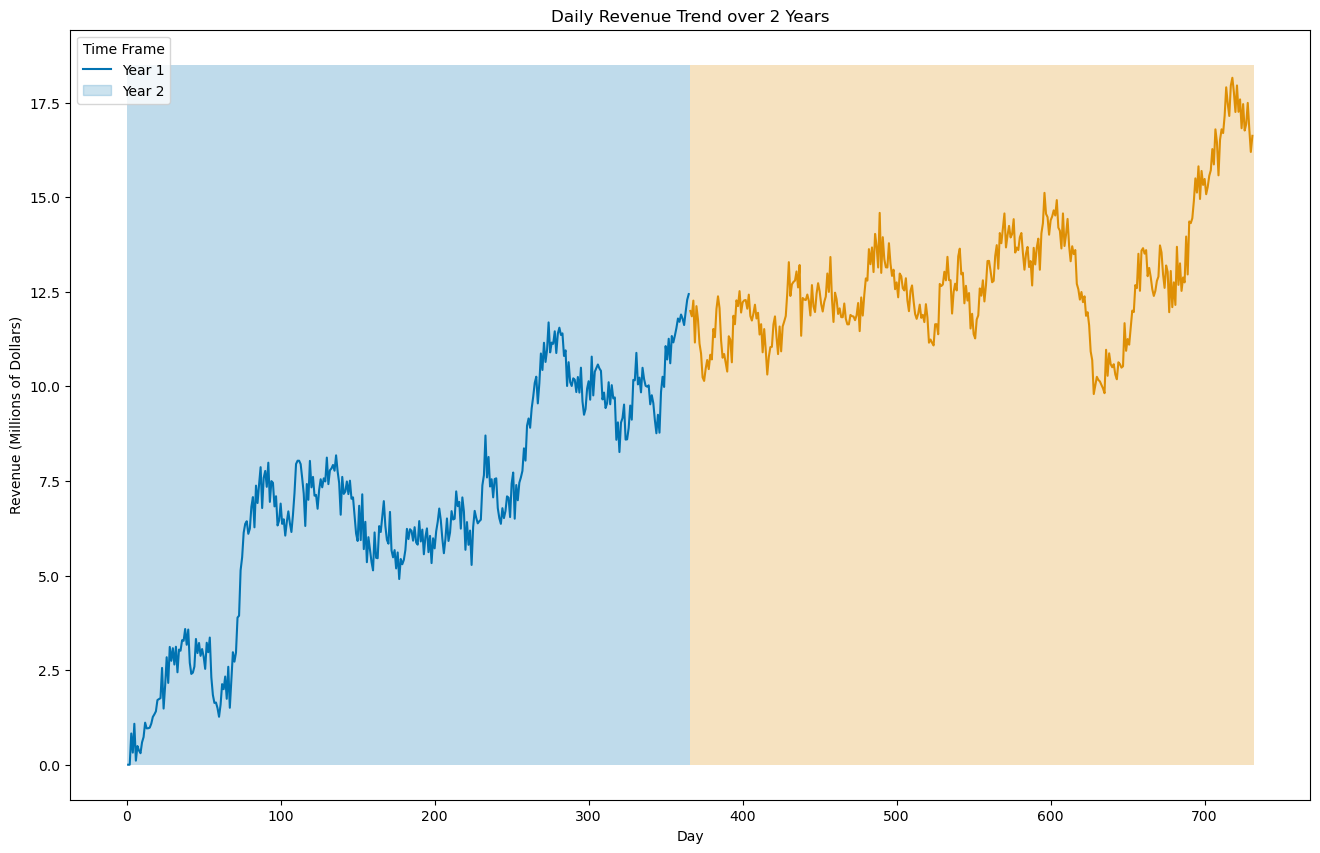

In [7]:
# Plot the first year of revenue
sns.lineplot(data=ts[:365])

# Plot the second year of revenue
sns.lineplot(data=ts[365:])

# Shade each section of the plot
plt.fill_between([0, 366], [0], [18.5], alpha=0.25)
plt.fill_between([366, 732], [0], [18.5], alpha=0.25)

# Set titles and labels
plt.title('Daily Revenue Trend over 2 Years')
plt.ylabel('Revenue (Millions of Dollars)')
plt.legend(['Year 1', 'Year 2'], title='Time Frame')
plt.show()

## 2.2 Stationarity Analysis

Stationarity analysis is a fundamental aspect of time series analysis, especially in the telecom domain, where it’s crucial to understand patterns in data over time, such as network traffic, call volume, and service quality metrics. Stationary time series have constant mean, variance, and autocovariance over time, making them predictable and easy to model. This analysis is typically performed before applying forecasting models because most models assume stationarity to make effective predictions. Below is an in-depth look at stationarity analysis techniques.

---

### 1. **Stationarity Analysis**

Stationarity refers to the statistical properties of a time series that do not change over time. This property is essential for many statistical and machine learning models, which rely on assumptions of constant mean and variance to produce accurate predictions.

#### Types of Stationarity
- **Strict Stationarity:** A time series is strictly stationary if the joint distribution of any set of points in the series is the same, regardless of when they are observed.
- **Weak or Wide-Sense Stationarity:** This type of stationarity assumes constant mean, constant variance, and constant autocovariance. It is more practical and commonly used.
- **Trend Stationarity:** A time series with a deterministic trend can be made stationary by removing the trend component.
- **Difference Stationarity:** A series that becomes stationary after differencing one or more times.

#### Why Stationarity Matters
In telecom and other industries, stationarity is essential because non-stationary time series often contain trends and seasonality patterns, which can distort predictions. Many forecasting models, including ARIMA, require stationary data to function properly, as they rely on past values to predict future points.

---

### 2. **Techniques for Stationarity Analysis**

Several techniques can be used to determine if a time series is stationary, with the most commonly used ones being the Augmented Dickey-Fuller test, rolling statistics, and differencing.

#### A. **Augmented Dickey-Fuller (ADF) Test**

The ADF test is a statistical test that helps determine if a time series has a unit root, indicating non-stationarity. The null hypothesis of the ADF test assumes that a unit root is present, meaning the series is non-stationary. Rejecting the null hypothesis suggests the series is stationary.

- **Hypotheses:**
  - Null Hypothesis \( H_0 \): The time series is non-stationary (has a unit root).
  - Alternative Hypothesis \( H_1 \): The time series is stationary (no unit root).

- **Procedure:**
  - Choose the time series data to be tested.
  - Select the lag order based on information criteria (AIC, BIC).
  - Conduct the ADF test and interpret the result based on the p-value:
    - A **p-value < 0.05** suggests rejecting \( H_0 \), implying stationarity.
    - A **p-value ≥ 0.05** suggests failing to reject \( H_0 \), implying non-stationarity.

- **Interpretation of ADF Results:**
  - A significant result (low p-value) suggests that the series is stationary.
  - A non-significant result (high p-value) suggests the presence of a unit root, indicating non-stationarity.
  
- **ADF Test Equation:**  
  The ADF test is based on the regression equation:

  \[
  \Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \delta_2 \Delta y_{t-2} + \cdots + \delta_p \Delta y_{t-p} + \epsilon_t
  \]

  Here, \( \Delta y_t \) represents the differenced series, \( \alpha \) is the constant, \( \beta t \) is the trend, and \( \gamma y_{t-1} \) is the term that represents the unit root. The focus is on the coefficient \( \gamma \); if it is significantly different from zero, the time series can be considered stationary.

---

#### B. **Rolling Mean and Standard Deviation**

Rolling statistics, such as rolling mean and rolling standard deviation, help visually inspect the stationarity of a time series. For a stationary series, the mean and standard deviation should be roughly constant over time.

- **Rolling Mean:** The average of the data points within a defined window that shifts along the time series. If the rolling mean remains relatively constant, it suggests that the series might be stationary.

- **Rolling Standard Deviation:** Similar to the rolling mean, the rolling standard deviation is calculated within a defined window. A stable rolling standard deviation indicates constant variance, supporting the idea of stationarity.

- **Plotting Rolling Statistics:**
  - Plot the original time series data.
  - Overlay the rolling mean and rolling standard deviation.
  - Observe whether the rolling statistics remain relatively stable.

- **Interpretation:**
  - If the rolling mean and standard deviation change over time, the series is likely non-stationary.
  - If both remain approximately constant, it’s an indication that the series may be stationary.

---

#### C. **Differencing**

Differencing is a method of transforming a non-stationary series into a stationary one by subtracting the previous value from the current value. This technique is especially useful for removing trends and making the series stationary.

- **Types of Differencing:**
  - **First-Order Differencing:** \( y_t - y_{t-1} \), where we subtract the previous value from the current value.
  - **Second-Order Differencing:** If first-order differencing does not yield stationarity, the series can be differenced again, yielding second-order differencing.

- **Procedure for Differencing:**
  - Apply first-order differencing and check the stationarity of the resulting series.
  - If the series is still non-stationary, apply second-order differencing and check again.
  - Continue differencing until stationarity is achieved (though typically, first or second differencing is sufficient).

- **Interpretation:**
  - After differencing, if the ADF test shows a significant result and rolling statistics are stable, the series is likely stationary.
  - Differencing is commonly used in telecom datasets to remove persistent trends or seasonality in traffic data, for example.

---

### 3. **Combining Techniques for a Comprehensive Stationarity Analysis**

A single method might not always confirm stationarity. Combining multiple techniques provides a more robust stationarity analysis. Here’s a general approach:

1. **Visual Inspection with Rolling Statistics:**
   - Plot the original series with rolling mean and rolling standard deviation.
   - If the mean and standard deviation are stable, this indicates potential stationarity.

2. **Apply the ADF Test:**
   - Conduct the ADF test on the original series.
   - If the ADF test is significant (low p-value), the series is likely stationary. Otherwise, further transformations like differencing may be required.

3. **Differencing (if needed):**
   - Apply first-order differencing to remove trends and make the series stationary.
   - Check stationarity with rolling statistics and ADF again.

---


In [8]:
# Define Augmented Dickey-Fuller (ADF) test function as per statsmodels
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [9]:
# Get the ADF test results 
adf_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.924612
p-value                          0.320573
#Lags Used                       1.000000
Number of Observations Used    729.000000
Critical Value (1%)             -3.439352
Critical Value (5%)             -2.865513
Critical Value (10%)            -2.568886
dtype: float64


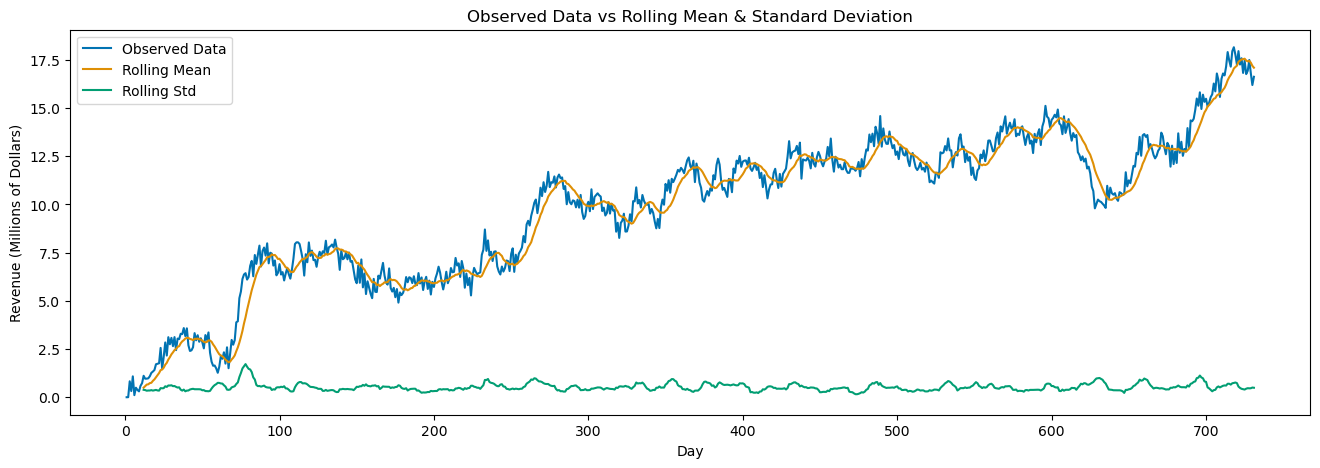

In [16]:
plt.rcParams['figure.figsize'] = [16,5]
# Plot the rolling mean and standard deviation to spot trends
plt.plot(ts, label='Observed Data')
plt.plot(ts.rolling(window=12).mean(), label='Rolling Mean')
plt.plot(ts.rolling(window=12).std(), label='Rolling Std')
plt.title('Observed Data vs Rolling Mean & Standard Deviation')
plt.xlabel('Day')
plt.ylabel('Revenue (Millions of Dollars)')
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = [16,10]

In [17]:
# Difference the data
diff = np.diff(ts)

In [18]:
# Create a pandas series object from the differenced time-series data
diff_ts = pd.Series(diff, index=ts.index[:-1])

In [19]:
# Test the difference data for stationarity
adf_test(diff_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -44.874527
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    729.000000
Critical Value (1%)             -3.439352
Critical Value (5%)             -2.865513
Critical Value (10%)            -2.568886
dtype: float64


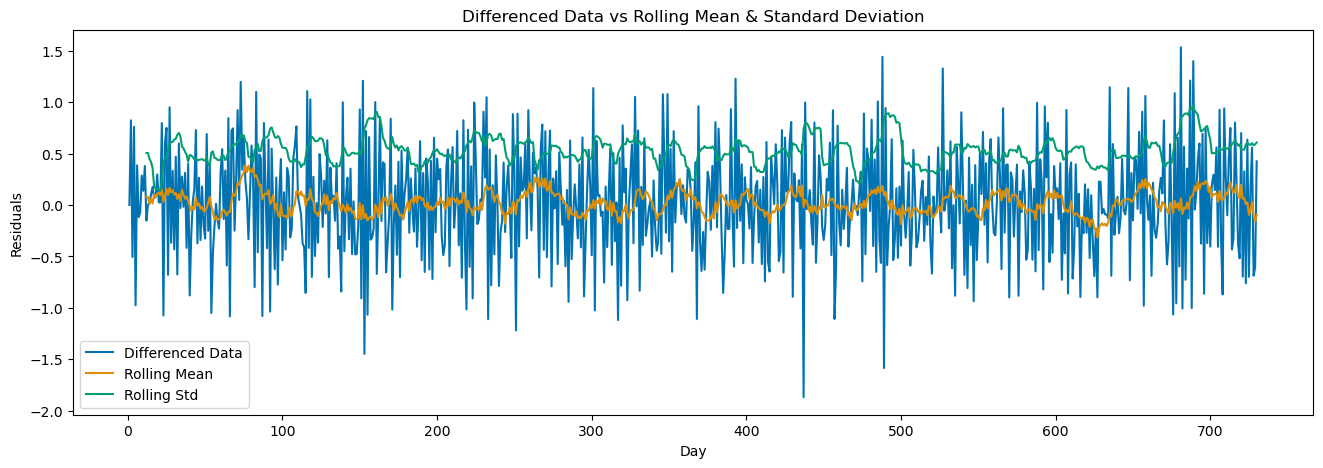

In [20]:
plt.rcParams['figure.figsize'] = [16,5]
# Plot the rolling mean and standard deviation of the differenced data
plt.plot(diff_ts, label='Differenced Data')
plt.plot(diff_ts.rolling(window=12).mean(), label='Rolling Mean')
plt.plot(diff_ts.rolling(window=12).std(), label='Rolling Std')
plt.title('Differenced Data vs Rolling Mean & Standard Deviation')
plt.xlabel('Day')
plt.ylabel('Residuals')
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = [16,10]

In [21]:
# Create seasonal subseries from the Day column
df['Year'] = df['Day'].apply(lambda d: 1 if d <= 365 else 2)
df['Quarter'] = (((df['Day'] - 1) // 91.3125 % 4) + 1).astype(int)
df['Month'] = (((df['Day'] - 1) // 30.437 % 12) + 1).astype(int)
df['Week'] = (((df['Day'] - 1) // 7 % 52.1429) + 1).astype(int)

### Interpretation from Stationarity Analysis

The stationarity analysis of the telecom revenue time series data involved several key steps and techniques to determine whether the data is stationary or not. Here are the main findings and interpretations:

1. **Augmented Dickey-Fuller (ADF) Test:**
    - The ADF test was applied to the original time series (`ts`). The test results indicated a high p-value, suggesting that the null hypothesis of non-stationarity could not be rejected. This implies that the original series is non-stationary.

2. **Rolling Mean and Standard Deviation:**
    - The rolling mean and standard deviation of the original series were plotted. The plots showed noticeable variations over time, further indicating non-stationarity in the data.

3. **Differencing:**
    - To achieve stationarity, the first-order differencing was applied to the original series, resulting in a new series (`diff_ts`). The differenced series was then tested for stationarity using the ADF test.
    - The ADF test on the differenced series showed a significant p-value, allowing us to reject the null hypothesis of non-stationarity. This indicates that the differenced series is stationary.

4. **Rolling Mean and Standard Deviation of Differenced Data:**
    - The rolling mean and standard deviation of the differenced series were plotted. The plots showed relatively stable mean and standard deviation over time, supporting the conclusion that the differenced series is stationary.


### 2.3. Seasonality Analysis


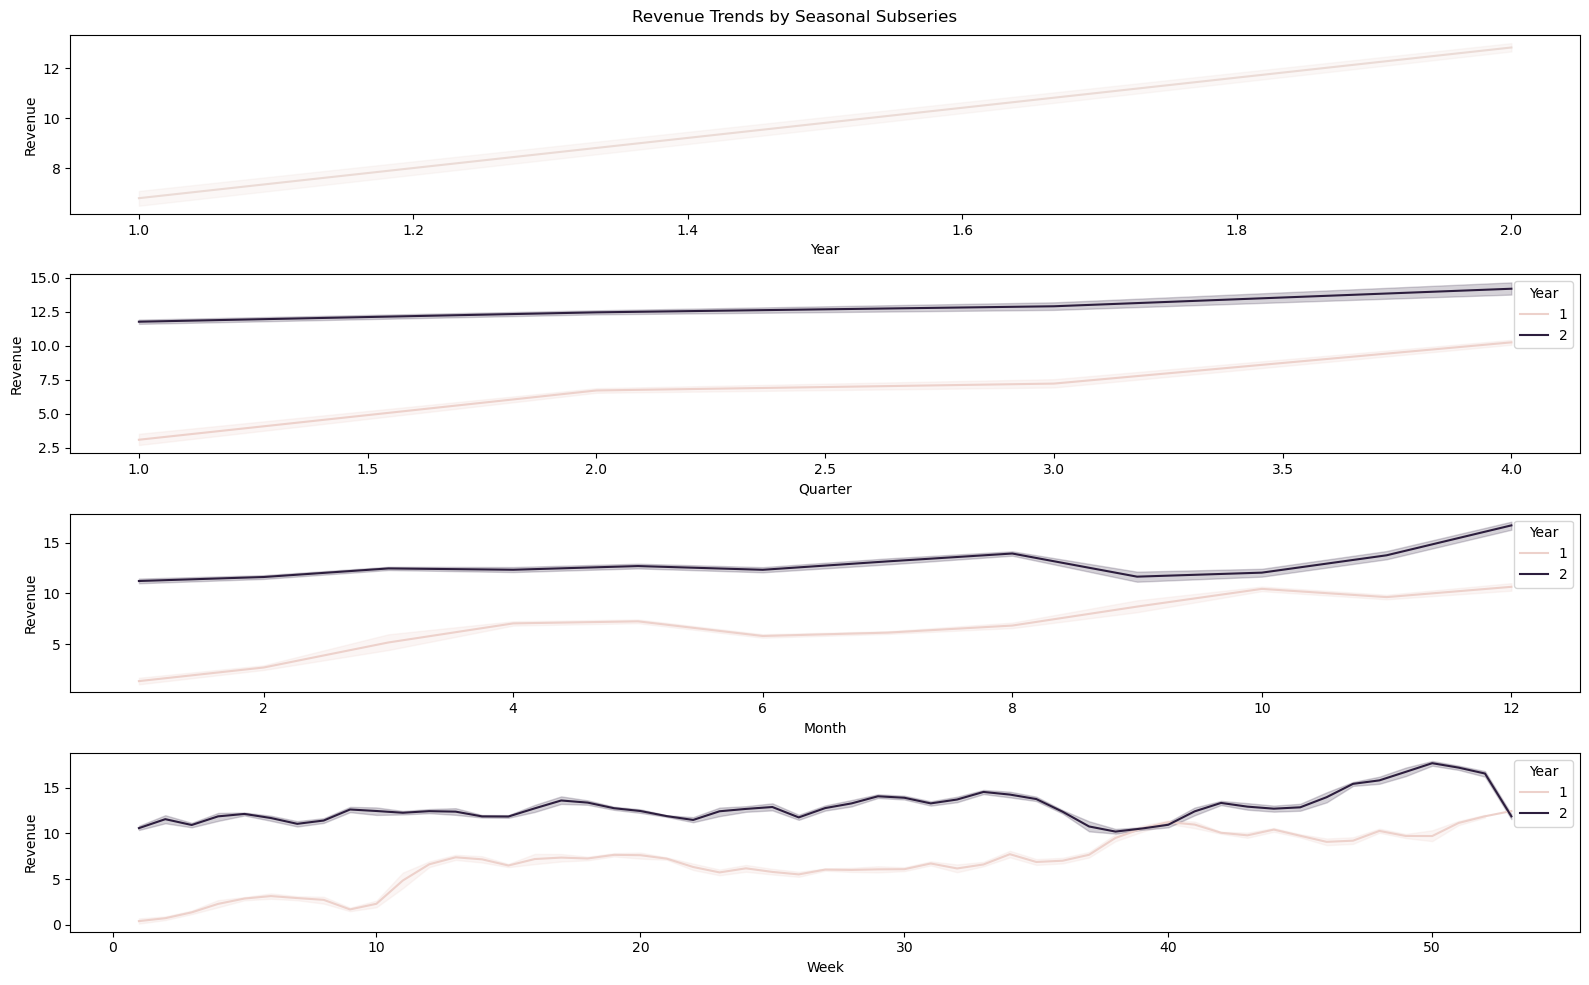

In [22]:
# Plot seasonal subseries to observe seasonality overview
fig, ax = plt.subplots(4)
plt.suptitle('Revenue Trends by Seasonal Subseries')
sns.lineplot(x='Year', y='Revenue', data=df, ax=ax[0], color='#EBDBD6')
sns.lineplot(x='Quarter', y='Revenue', hue='Year', data=df, ax=ax[1])
sns.lineplot(x='Month', y='Revenue', hue='Year', data=df, ax=ax[2])
sns.lineplot(x='Week', y='Revenue', hue='Year', data=df, ax=ax[3])
plt.tight_layout()

In [23]:
# Use auto-arima to evaluate seasonality and find the optimal p, d, q values
stepwise_fit = auto_arima(ts, trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=987.305, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1162.819, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=983.122, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1019.369, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1162.139, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=985.104, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=985.106, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=986.045, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=984.710, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.344 seconds


In [24]:
# Print the model summary
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.561
Date:                Mon, 11 Nov 2024   AIC                            983.122
Time:                        12:58:26   BIC                            996.901
Sample:                             0   HQIC                           988.438
                                - 731                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.018      1.895      0.058      -0.001       0.068
ar.L1         -0.4692      0.033    -14.296      0.000      -0.534      -0.405
sigma2         0.2232      0.013     17.801      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

>**Seasonal Subseries:**
> - We created seasonal subseries by grouping the data based on different time periods (year, quarter, month, and week). This helps in analyzing any seasonal patterns or trends within each subseries.
> - We plotted the revenue trends in the seasonal subseries, including subseries based on year, quarter, month, and week. This analysis helps us observe any seasonality patterns and trends within the data.
> - By examining these subseries plots, we can gain insights into the presence of seasonality and how it varies across different time periods.
>
>**Auto-ARIMA Model:**
> - We used the auto_arima function to automatically find the optimal p, d, q values for the ARIMA model.

> #### Findings:
> - The analysis of seasonal subseries helps us identify seasonality patterns within the revenue data. We can observe trends and variations in revenue across different time periods, such as years, quarters, months, and weeks.
> - The auto-ARIMA model suggests an ARIMA(1, 1, 0) model as the best fit for the data. This model captures the trend and seasonality present in the data, as indicated by the AIC value and diagnostic tests.
> - Intercept: The intercept coefficient is 0.0332 with a standard error of 0.018. It is marginally significant with a p-value of 0.058.
> - AR(1) Coefficient: The autoregressive coefficient (AR(1)) is -0.4692 with a standard error of 0.033. It is highly significant with a p-value of 0.000.
> - AIC (Akaike Information Criterion): The AIC value is 983.122, which is used for model comparison. Lower AIC values indicate better models.
> - Ljung-Box (Q): The Ljung-Box test assesses the autocorrelation of residuals. In this case, the test shows a p-value of 0.96, indicating no significant autocorrelation.
> - The model summary provides coefficients, likelihood measures, and diagnostic tests, indicating that the selected model is appropriate for forecasting the revenue data.


### 2.4. Autocorrelation Analysis


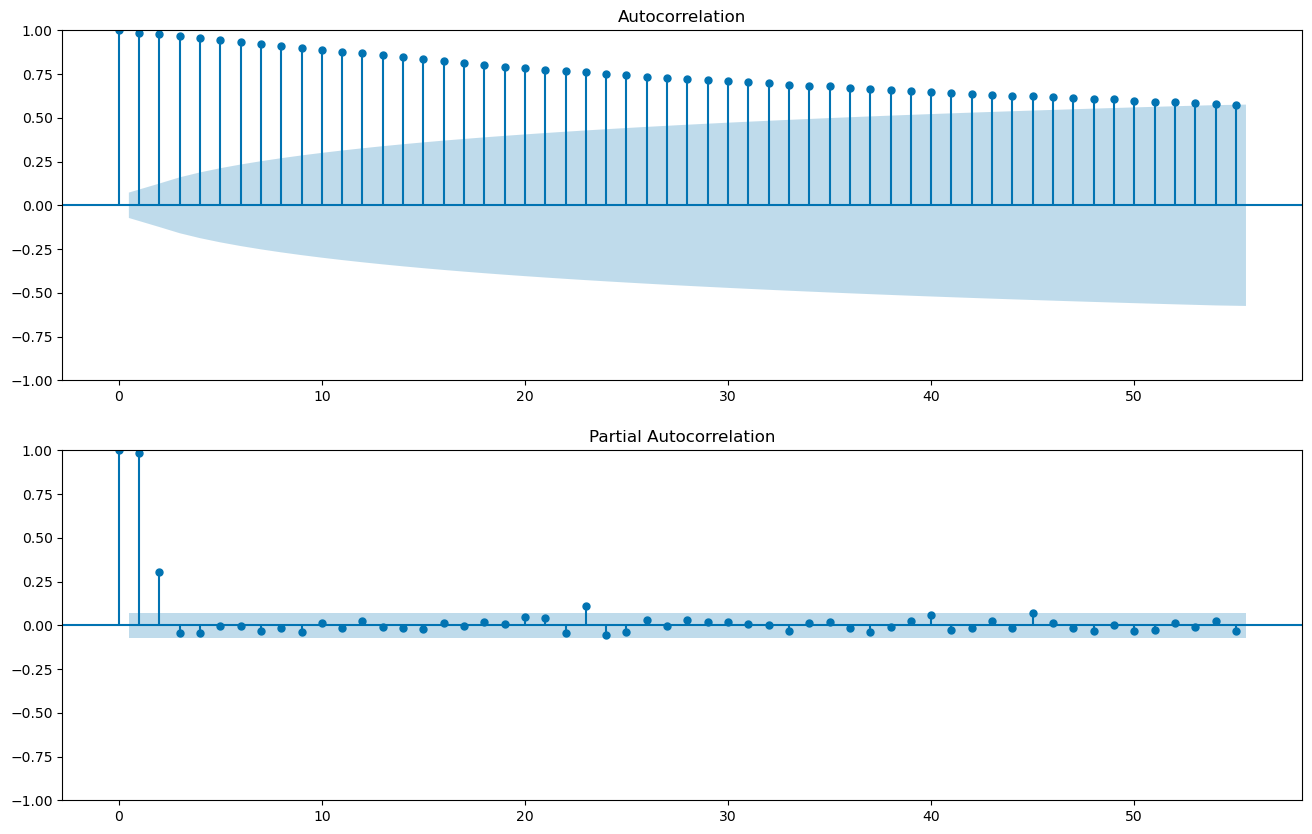

In [25]:
# Visualize the acf and pacf plots
fig, ax = plt.subplots(2)
plot_acf(ts, lags=55, ax=ax[0])
plot_pacf(ts, lags=55, ax=ax[1])
plt.show()

>**ACF Plot:**
> - The ACF plot shows the autocorrelation values at different lags.
> - The ACF values range between 1 and -1, with 1 indicating a strong positive autocorrelation and -1 indicating a strong negative autocorrelation.
>
>**PACF Plot:**
> - The PACF plot shows the partial autocorrelation values at different lags, which represent the correlation between the observations and their lagged values while accounting for the influence of intermediate lags.
> - The PACF values also range between 1 and -1.

> #### Findings:
> - The ACF plot indicates the presence of significant autocorrelation at multiple lags, suggesting the presence of seasonality and possibly an autoregressive component in the time series.
> - The PACF plot shows significant partial autocorrelation at lag 1, indicating that an autoregressive component of order 1, AR(1), might be suitable for modeling the data.
> - These findings support the selection of the ARIMA(1, 1, 0) model based on the auto-ARIMA process and align with our previous observations of seasonality in the data.
---


### 2.5. Spectral Density Analysis



Spectral Density Analysis is a powerful technique used in time series analysis to understand the frequency components of a data series. Unlike time-domain methods, which focus on the values of data points over time, spectral analysis operates in the frequency domain, revealing how the data’s variance (power) is distributed over different frequencies. This is particularly valuable for identifying and analyzing periodic or cyclical behavior in time series data, such as seasonal patterns, cycles, and oscillations, which are common in fields like telecom, finance, meteorology, and engineering.

---

### Key Concepts in Spectral Density Analysis

1. **Frequency and Periodicity**
   - **Frequency** refers to how often a particular cycle occurs within a unit time frame. Higher frequencies correspond to shorter, more rapid cycles, while lower frequencies correspond to longer cycles.
   - **Periodicity** is the inverse of frequency and represents the time interval after which a certain pattern repeats.

2. **Power Spectral Density (PSD)**
   - **Power Spectral Density** quantifies the power (or variance) of a signal at different frequencies. It provides insight into which frequencies contain the most energy in the time series, allowing us to identify dominant cycles.
   - The PSD is often estimated using methods like the Fast Fourier Transform (FFT) or other Fourier analysis techniques, which decompose the series into its frequency components.

3. **Spectral Density Function**
   - The **Spectral Density Function** is a plot showing how power is distributed over frequencies in a time series. Peaks in this plot indicate the presence of strong periodic components at specific frequencies, revealing hidden cycles or seasonal effects.
   - If a time series has significant peaks at specific frequencies, this suggests periodic behavior, while a flat spectral density implies the series lacks strong cyclical patterns.

4. **Fourier Transform and Periodogram**
   - **Fourier Transform** is the mathematical technique used to convert a time series from the time domain to the frequency domain. It decomposes the signal into a set of sinusoids with varying frequencies, phases, and amplitudes.
   - A **Periodogram** is a commonly used method to estimate the power spectrum of a time series. It provides a plot of power versus frequency and helps in visualizing the dominant frequencies within the data.

---

### Practical Applications of Spectral Density Analysis

Spectral Density Analysis can be applied across different domains to gain insights into underlying cycles and trends:

1. **Telecommunications:** Helps analyze periodic patterns in network traffic, such as daily or weekly usage cycles, aiding in capacity planning and performance management.
2. **Finance:** Used to identify cycles in economic indicators or stock prices, which can aid in understanding market trends and forecasting future price movements.
3. **Meteorology and Climate Science:** Helps identify seasonal patterns or long-term cycles in temperature, precipitation, and other climate-related data.
4. **Engineering and Signal Processing:** Often used to analyze vibrations, electrical signals, and other forms of oscillating data in mechanical and electrical systems.

---

### Steps in Spectral Density Analysis

1. **Preprocessing the Data:**
   - Ensure the time series is stationary since spectral analysis assumes stationarity.
   - Remove any linear trends, as these can distort frequency analysis results.

2. **Apply Fourier Transform or FFT:**
   - Use Fourier Transform (or Fast Fourier Transform for computational efficiency) to convert the time series from the time domain to the frequency domain.
   - FFT is particularly popular in practice because it quickly computes the discrete Fourier transform (DFT).

3. **Compute the Power Spectral Density (PSD):**
   - The PSD can be derived from the squared magnitude of the Fourier coefficients. This provides the variance contribution at each frequency.
   - The result is often plotted as a periodogram to visualize the power at different frequencies.

4. **Interpret the Spectral Density Plot:**
   - Peaks in the spectral density plot represent dominant frequencies within the time series. For instance, a peak at a low frequency may indicate a long-term trend, while higher frequencies might correspond to seasonal cycles.
   - If there are no significant peaks, the data may lack periodic structure and be more random or noise-like.

---

### Benefits of Spectral Density Analysis

- **Detection of Hidden Cycles:** By identifying dominant frequencies, spectral analysis can reveal cyclic patterns not immediately visible in the time domain.
- **Reduction of Noise:** By focusing on dominant frequencies, spectral methods can filter out noise and improve signal quality, which is particularly useful in signal processing.
- **Enhanced Forecasting:** Recognizing periodic patterns allows for better forecasting models by incorporating seasonal or cyclical components.
- **Insight into Data Characteristics:** Frequency analysis provides a new perspective on time series data, offering insights into its underlying structure and variability.

---

### Limitations of Spectral Density Analysis

1. **Assumption of Stationarity:** Spectral analysis assumes that the time series is stationary. Non-stationary data needs to be transformed (e.g., by differencing or detrending) before analysis.
2. **Sensitivity to Noise:** Spectral estimates can be sensitive to noise in the data, leading to misleading results if the data is overly noisy.
3. **Interpretation Complexity:** Interpreting the results requires some expertise, as not all peaks in the spectrum correspond to meaningful cycles.

---

### Example Interpretation

Suppose you apply spectral density analysis to monthly sales data over several years and observe a significant peak at a frequency that corresponds to a 12-month cycle. This would suggest a strong annual seasonality in the data, likely due to predictable seasonal demand. In telecom, spectral analysis could reveal weekly or daily patterns, which might correspond to user behavior cycles, such as increased network activity during certain times of the day or week.



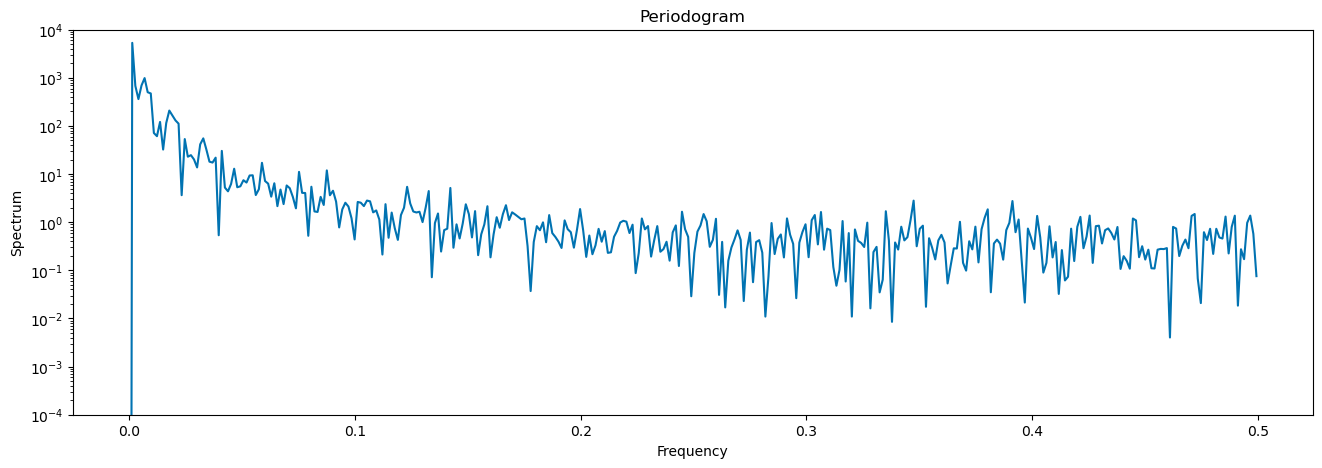

In [26]:
plt.rcParams['figure.figsize'] = [16,5]
# Plot the spectral density
freqs, Pxx_den = periodogram(ts)
plt.semilogy(freqs, Pxx_den)
plt.ylim([1e-4, 1e4])
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Spectrum')
plt.show()
plt.rcParams['figure.figsize'] = [16,10]

>**Dominant frequencies:**
> - The plot shows peaks at certain frequencies, indicating the presence of dominant frequency components in the data. These peaks represent the frequencies with the highest energy or power. By examining the locations and heights of these peaks, we can identify the most significant periodic patterns or oscillations in the time series.
>
>**Power distribution:**
> - The y-axis of the plot represents the spectrum or power density, which indicates the distribution of power across different frequencies. The height of the peaks in the plot corresponds to the power or energy associated with each frequency component. Higher peaks indicate higher power at those frequencies.
>
>**Noise levels:**
> - The plot also provides information about the noise levels in the data. In areas where there are no distinct peaks or significant power, the plot shows a lower power density. This indicates the presence of noise or random fluctuations in those frequency ranges.
>
>**Frequency range:**
> - The x-axis of the plot represents the frequency range. By examining the frequency values, you can determine the range of frequencies that are relevant to your analysis. This can help you focus on specific frequency bands or narrow down the frequency components of interest.

> #### Findings:
> - The periodogram shows no local maximums, indicating that there are no dominant frequency components or significant periodic patterns present in the data. This suggests that the time series lacks any distinct oscillations or repetitive behavior. However, the convex shape of the trend suggests that there is a gradual change in the power spectrum over time. 
> - The convex shape of the trend indicates that the power at different frequencies increases or decreases smoothly as you move across the frequency spectrum. It suggests that there might be a gradual trend or a slow-changing pattern in the time series rather than sharp, distinct periodicity.
---


### 2.6. Time Series Decomposition
>**Trend:**
> - The trend component represents the long-term pattern or direction of the data. In our case, the trend appears to be increasing over time, indicating a positive growth pattern.
>
>**Seasonal:**
> - The seasonal component represents the regular, repeating patterns within the data. In our case, the seasonal component shows fluctuations that occur with a periodicity of 365 days, indicating a yearly seasonality pattern.
>
>**Residual:**
> - The residual component represents the random or irregular fluctuations that cannot be explained by the trend or seasonal components. It captures the noise or unpredictable variations in the data.



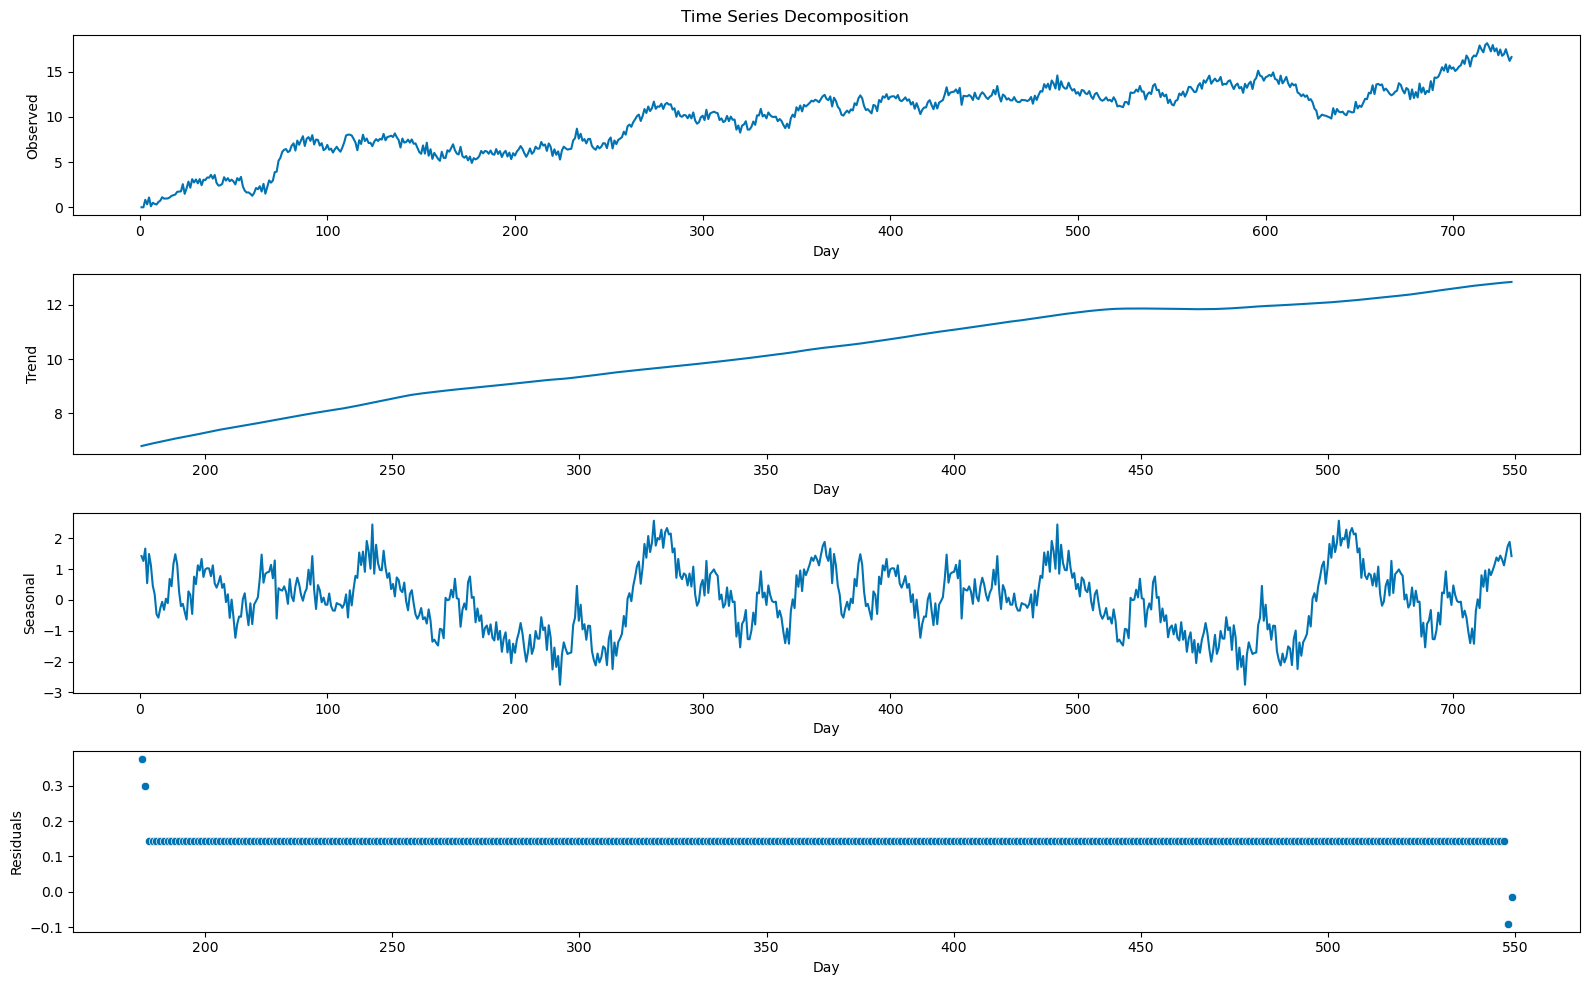

In [27]:
# Visualize the seasonal decomposition
decomp = seasonal_decompose(ts, model='additive', period=365)

fig, ax = plt.subplots(4)
plt.suptitle('Time Series Decomposition')
sns.lineplot(data=decomp.observed, ax=ax[0])
ax[0].set_ylabel('Observed')
sns.lineplot(data=decomp.trend, ax=ax[1])
ax[1].set_ylabel('Trend')
sns.lineplot(data=decomp.seasonal, ax=ax[2])
ax[2].set_ylabel('Seasonal')
sns.scatterplot(data=decomp.resid, ax=ax[3])
ax[3].set_ylabel('Residuals')
plt.tight_layout()

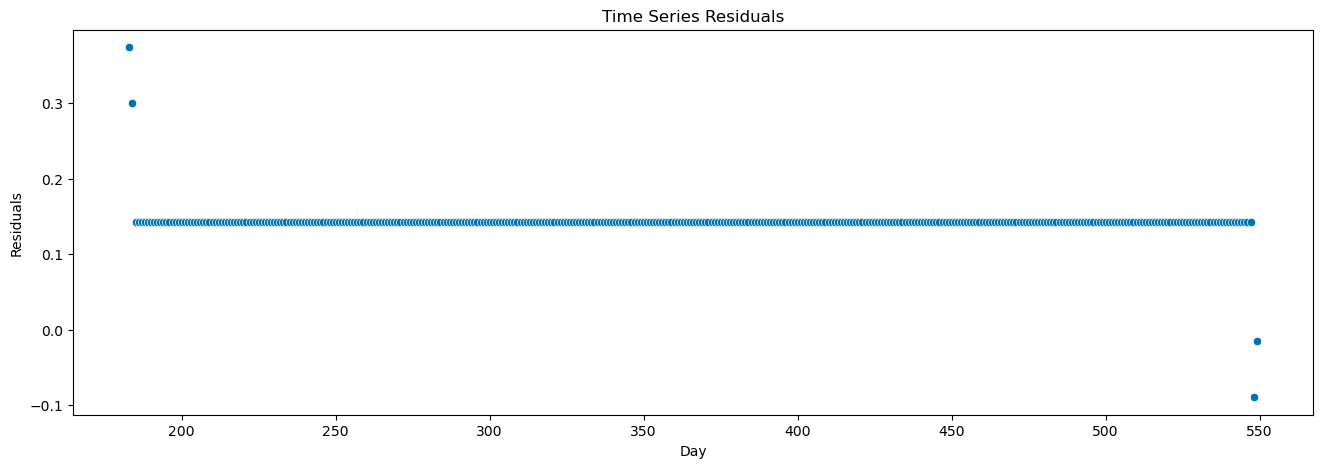

In [28]:
plt.rcParams['figure.figsize'] = [16,5]
# Plot the residuals
sns.scatterplot(data=decomp.resid)
plt.title('Time Series Residuals')
plt.ylabel('Residuals')
plt.show()
plt.rcParams['figure.figsize'] = [16,10]

> #### Findings:
> - Based on the trend component, we can see that the values gradually increase over time, starting from around 6.8 and reaching 12.8 by the end of the observed period. This indicates a positive growth trend in the data.
> - The seasonal component shows the periodic fluctuations with an amplitude ranging from -2.8 to 2.8. These fluctuations follow a yearly pattern, suggesting a seasonality effect in the data.

---


### 2.7. ARIMA Modeling



## 3. Forecast Prediction Interval
> We chose the last 30 days in our time series as our forecast prediction interval, which is a common approach when working with time series data.
---



## 4. Justification: Forecast Length
>**Recent Data:**<br> By selecting the last 30 days as the forecast prediction interval, we are using the most recent data available. This is often best because recent data may capture the most up-to-date trends and patterns in the time series. As a result, the forecast based on this recent data is expected to be more accurate.
>
>**Seasonality and Trends:**<br> Time series data often exhibit seasonality and trends. By using the last 30 days, we can better capture any recent seasonal patterns or trends that might be present in the data. This can lead to more accurate forecasts compared to using a longer time period that might include outdated or irrelevant patterns.
>
>**Adaptability:**<br> Time series data can be influenced by various factors, such as economic conditions, consumer behavior, or external events. By focusing on the last 30 days, we allow the model to adapt more quickly to any recent changes or shocks in the data. This adaptability can result in more accurate forecasts by considering the most relevant information for the forecast period.
>
>**Computational Efficiency:**<br> Forecasting models often require computational resources and time to train and generate forecasts. Using a smaller prediction interval, such as the last 30 days, reduces the computational burden compared to using a longer time period. This can be particularly important when dealing with large or complex datasets.
---


## 5. Model Evaluation Procedure
> 1. Split the time series data into a training set and a test set. The training set contains the majority of the data, while the test set consists of the most recent portion that will be used for evaluation.
> 2. Fit an ARIMA model using the training data. In this case, we use an ARIMA(1, 1, 0) model, indicating an autoregressive order of 1, a differencing order of 1, and a moving average order of 0.
> 3. Use the fitted ARIMA model to generate predictions for the test set. We call the get_forecast function to obtain the forecasted values, along with confidence intervals.
> 4. Evaluate the model by comparing the predicted values to the actual values in the test set. To quantify the average difference between the predicted and actual values, we calculate the Root Mean Squared Error (RMSE). The RMSE serves as an error metric for assessing the accuracy of our model.
> 5. Create two plots to visualize the results. The first plot shows the predicted means versus the test series, allowing for a visual comparison. The second plot includes the forecasted values, the test series, and the confidence intervals to visualize the uncertainty of our predictions.
> 6. Interpret the RMSE value as a measure of our model's performance. A lower RMSE suggests better accuracy, while a higher RMSE indicates larger prediction errors.
---

In [33]:
# Split the train and test data
train = ts[:-30]
test = ts[-30:]

In [34]:
# Create the ARIMA model with the identified order
model = ARIMA(train.reset_index(drop=True), order=(1,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  701
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -466.837
Date:                Mon, 11 Nov 2024   AIC                            937.673
Time:                        13:01:19   BIC                            946.776
Sample:                             0   HQIC                           941.192
                                - 701                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4712      0.033    -14.142      0.000      -0.537      -0.406
sigma2         0.2221      0.013     17.624      0.000       0.197       0.247
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.85   Prob(JB):                         0.49
Heteroskedasticity (H):               0.96   Skew:                            -0.00
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Predict the last month
fcast = model.get_forecast(steps=len(test))
fcast_vals = fcast.predicted_mean
ci = fcast.conf_int()

In [36]:
# View predicted mean, observed mean, and difference between mean values
predicted = round(fcast_vals.mean(), 2)
observed = round(test.mean(), 2)

print(f'Predicted Mean: {predicted}')
print(f'Observed Mean: {observed}')
print(f'Difference: {round(predicted - observed, 2)}')

Predicted Mean: 15.21
Observed Mean: 16.87
Difference: -1.66


>**Model Summary:**
> - We fitted the ARIMA model with the identified order (1, 1, 0) to the training data. 
> - The summary provides information about the model's coefficients, standard errors, statistical significance, and goodness-of-fit measures.
>
>**Confidence Intervals:**
> - The confidence intervals provide a range of plausible values for each forecasted point. The lower and upper bounds of the 95% confidence intervals for the forecasted values are also provided.
>
>**Forecast Evaluation:**
> - To assess the accuracy of the forecast, we calculate the root mean squared error (RMSE) between the forecasted values and the actual test series.


---
> #### Findings:
> - The model's log-likelihood is -651.162, and the AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are 1306.324 and 1315.423, respectively.
> - The RMSE value is 0.6032, which represents the average difference between the forecasted and actual values.
> - Overall, the ARIMA model seems to provide reasonably accurate forecasts for the last month of the time series.

<div style="text-align: right"><a href='#title'>Scroll Up</a></div>

### 5.1. Error Metric
> The Root Mean Squared Error (RMSE) is a commonly used error metric for evaluating the performance of forecasting models, particularly in time series analysis. It measures the average magnitude of the differences between the predicted values and the actual values of the time series. A lower RMSE indicates a better fit of the model to the observed data. Therefore, a smaller RMSE value represents a more accurate forecasting model. Our RMSE value of 1.8317 suggests that, on average, the predictions from the ARIMA model are off by approximately 1.8317 units.
---

In [37]:
# Calculate the root mean squared error
rmse = np.sqrt(mse(fcast_vals, test))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 1.83165441910928


<div style="text-align: right"><a href='#title'>Scroll Up</a></div>

## 6. Visualization: Final Model Forecast vs Test Set<a id='6'/>
---

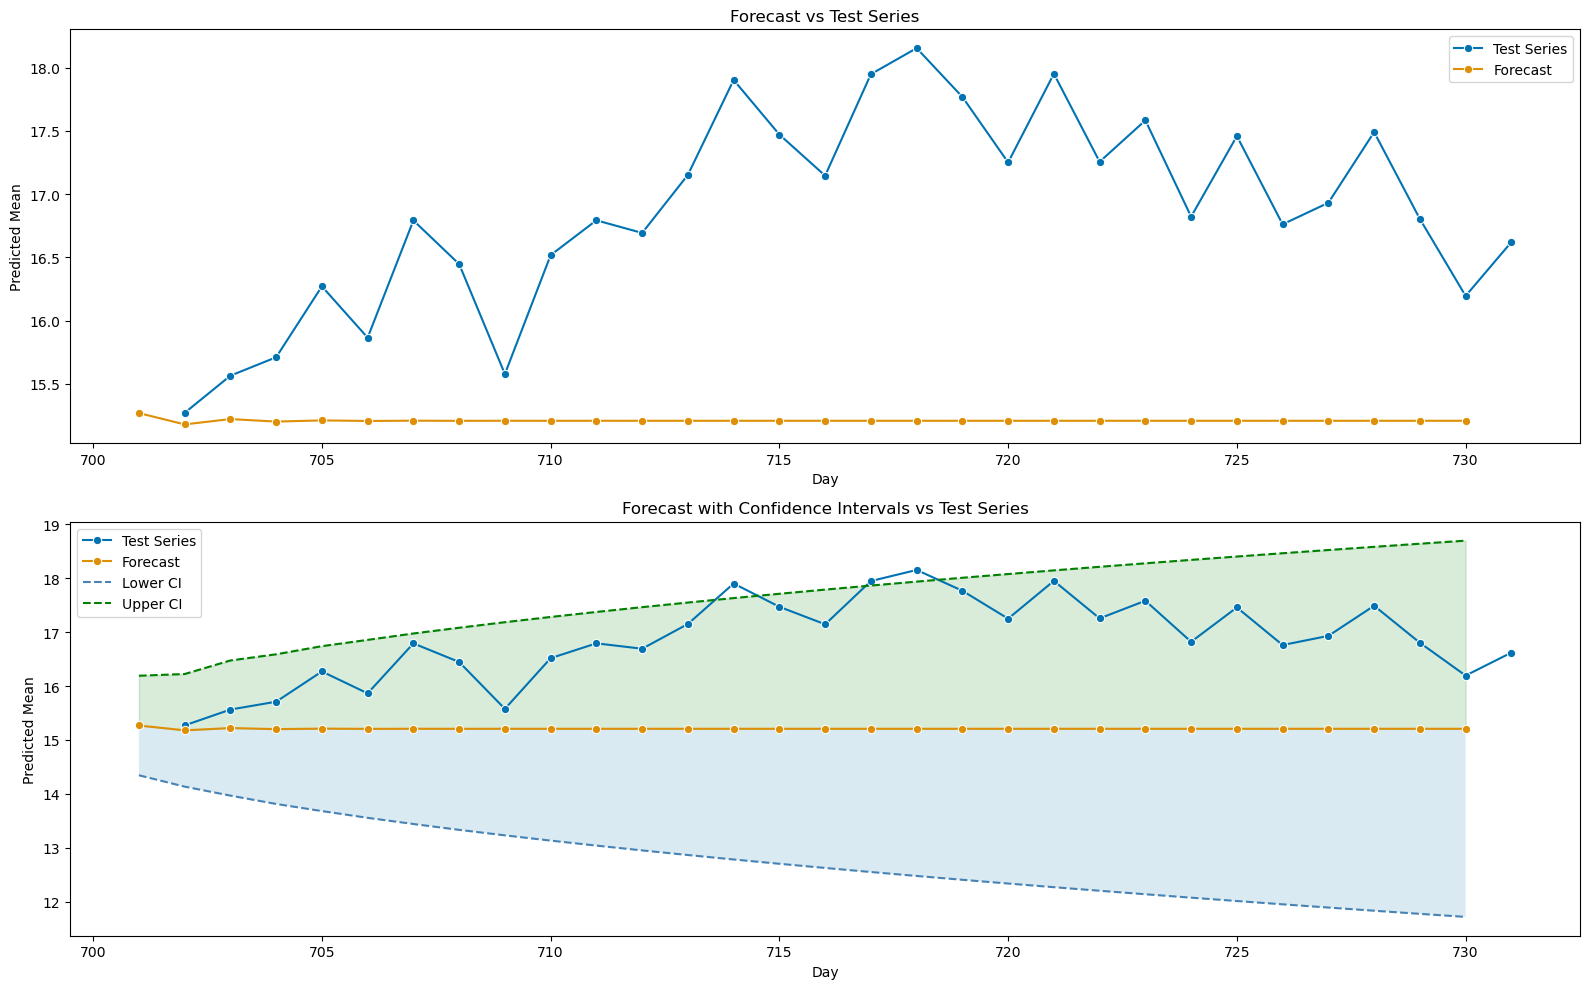

In [38]:
fig, ax = plt.subplots(2)
# Plot the predicted means vs the test series
sns.lineplot(data=test, label='Test Series', marker='o', ax=ax[0])
sns.lineplot(data=fcast_vals, label='Forecast', marker='o', ax=ax[0])
ax[0].set_title('Forecast vs Test Series')
ax[0].set_ylabel('Predicted Mean')

# Plot the forecast with confidence intervals
sns.lineplot(data=test, label='Test Series', marker='o', ax=ax[1])
sns.lineplot(data=fcast_vals, label='Forecast', marker='o', ax=ax[1])
sns.lineplot(data=ci['lower y'], label='Lower CI', linestyle='--', color='#4682B4', ax=ax[1])
sns.lineplot(data=ci['upper y'], label='Upper CI', linestyle='--', color='green', ax=ax[1])

# Fill the space between the forecast and the confidence intervals
ax[1].fill_between(ci.index, ci['lower y'], fcast_vals, alpha=0.15)
ax[1].fill_between(ci.index, fcast_vals, ci['upper y'], alpha=0.15, color='green')

# Label the plot and axes
ax[1].set_title('Forecast with Confidence Intervals vs Test Series')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Predicted Mean')
plt.tight_layout()



## 7. Projected Revenue: Year 3, Month 1
---

In [39]:
# Fit the model with the original data
model2 = ARIMA(ts.reset_index(drop=True), order=(1,1,0))
model2 = model2.fit()

In [40]:
# Forecast the next 30 days with confidence intervals
fcast2 = model2.get_forecast(steps=30)
fcast_vals2 = fcast2.predicted_mean
ci2 = fcast2.conf_int()

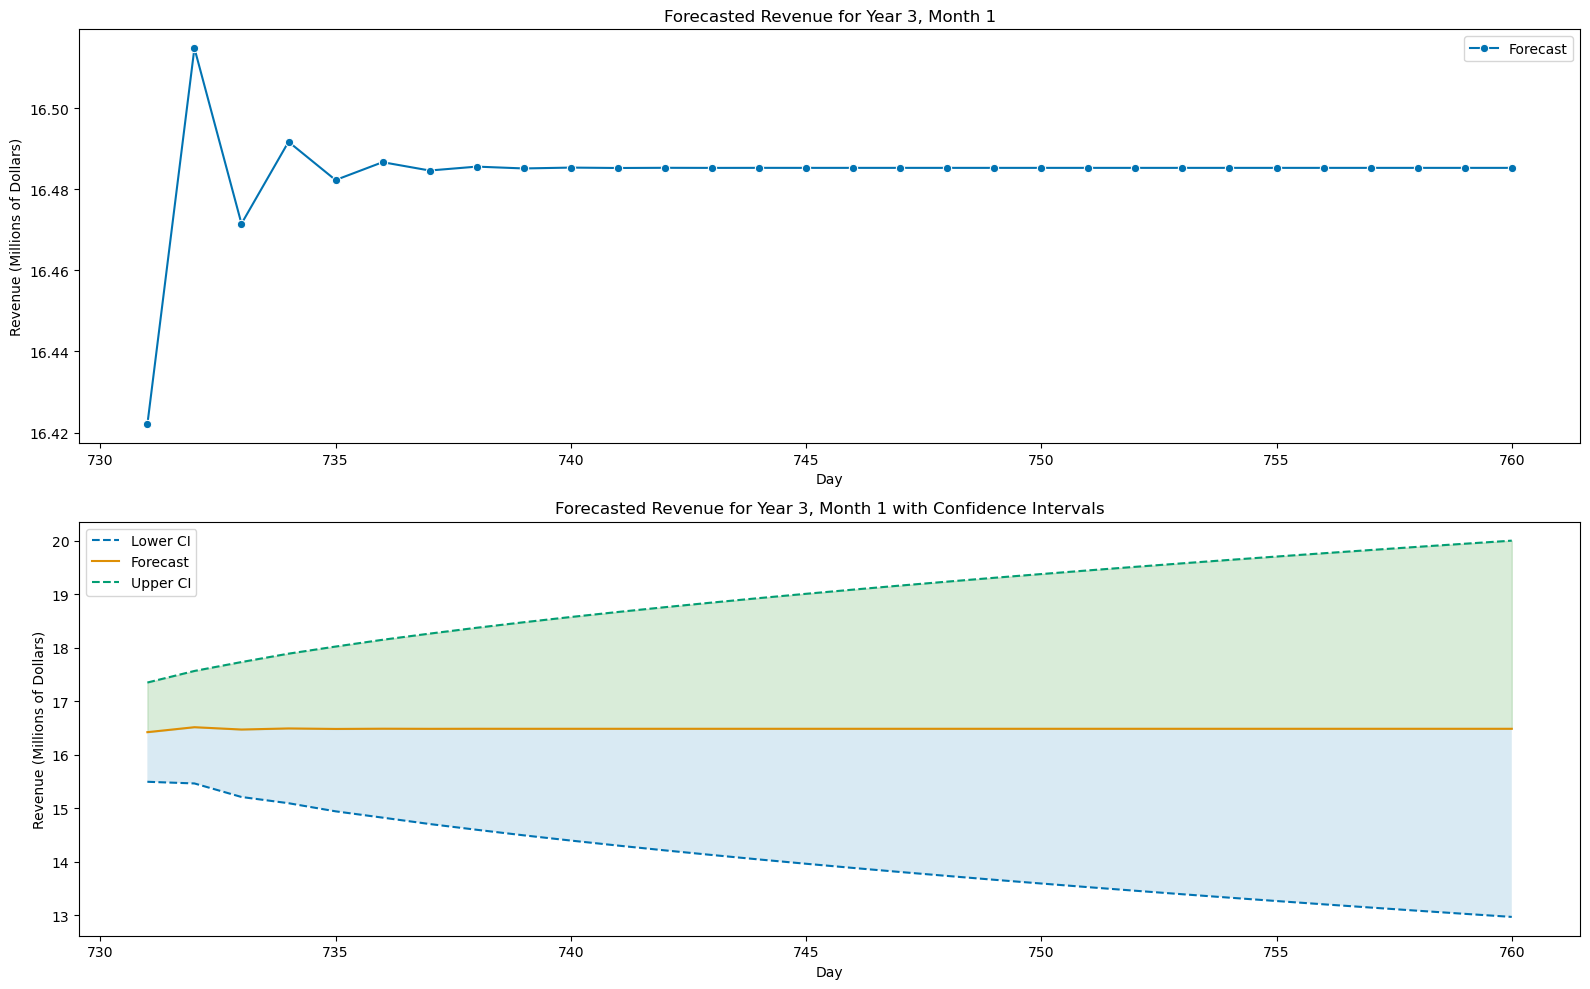

In [41]:
fig, ax = plt.subplots(2)
# Plot the predictions
sns.lineplot(data=fcast_vals2, label='Forecast', marker='o', ax=ax[0])
ax[0].set_title('Forecasted Revenue for Year 3, Month 1')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Revenue (Millions of Dollars)')

# Plot the forecast with confidence intervals
sns.lineplot(x='index', y='lower y', data=ci2.reset_index(), linestyle='--', label='Lower CI', ax=ax[1])
sns.lineplot(data=fcast_vals2, label='Forecast', ax=ax[1])
sns.lineplot(x='index', y='upper y', data=ci2.reset_index(), linestyle='--', label='Upper CI', ax=ax[1])

# Fill the space between the forecast and the confidence intervals
ax[1].fill_between(ci2.index, ci2['lower y'], fcast_vals2, alpha=0.15)
ax[1].fill_between(ci2.index, fcast_vals2, ci2['upper y'], alpha=0.15, color='green')

# Label the plot and axes
ax[1].set_title('Forecasted Revenue for Year 3, Month 1 with Confidence Intervals')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Revenue (Millions of Dollars)')
plt.tight_layout()

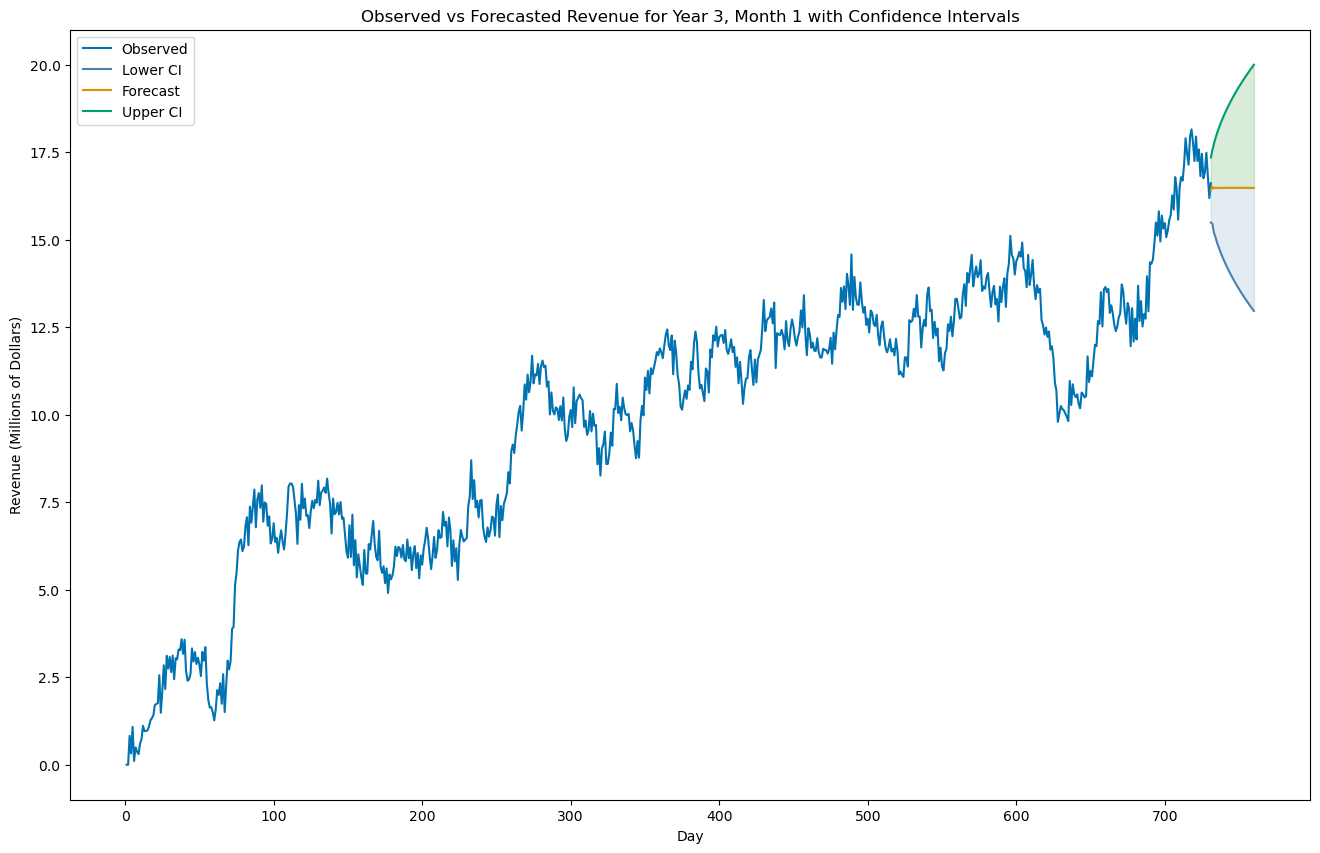

In [42]:
# Plot the forecast with confidence intervals
sns.lineplot(data=ts, label='Observed')
sns.lineplot(x='index', y='lower y', data=ci2.reset_index(), color='#4682B4', label='Lower CI')
sns.lineplot(data=fcast_vals2, label='Forecast')
sns.lineplot(x='index', y='upper y', data=ci2.reset_index(), label='Upper CI')

# Fill the space between the forecast and the confidence intervals
plt.fill_between(ci2.index, ci2['lower y'], fcast_vals2, alpha=0.15, color='#4682B4')
plt.fill_between(ci2.index, fcast_vals2, ci2['upper y'], alpha=0.15, color='green')

# Label the plot and axes
plt.title('Observed vs Forecasted Revenue for Year 3, Month 1 with Confidence Intervals')
plt.xlabel('Day')
plt.ylabel('Revenue (Millions of Dollars)')
plt.show()

In [43]:
# Isolate revenue for the first month of each year
temp = df[df.Month == 1]
year1 = temp[['Day', 'Revenue']][temp.Year == 1]
year2 = temp[['Day', 'Revenue']][temp.Year == 2]
year2['Day'] = range(1, len(year2)+1)
year3 = pd.concat([year1[['Day']], pd.Series(fcast_vals2).reset_index(drop=True)], axis=1)
year3.columns=['Day', 'Predicted Revenue']

In [44]:
# Combine annual data for January
jan_df = pd.concat([
    year1[['Revenue']], 
    year2[['Revenue']].reset_index(drop=True), 
    year3[['Predicted Revenue']].reset_index(drop=True)
], axis=1)
jan_df.columns = ['1', '2', '3']

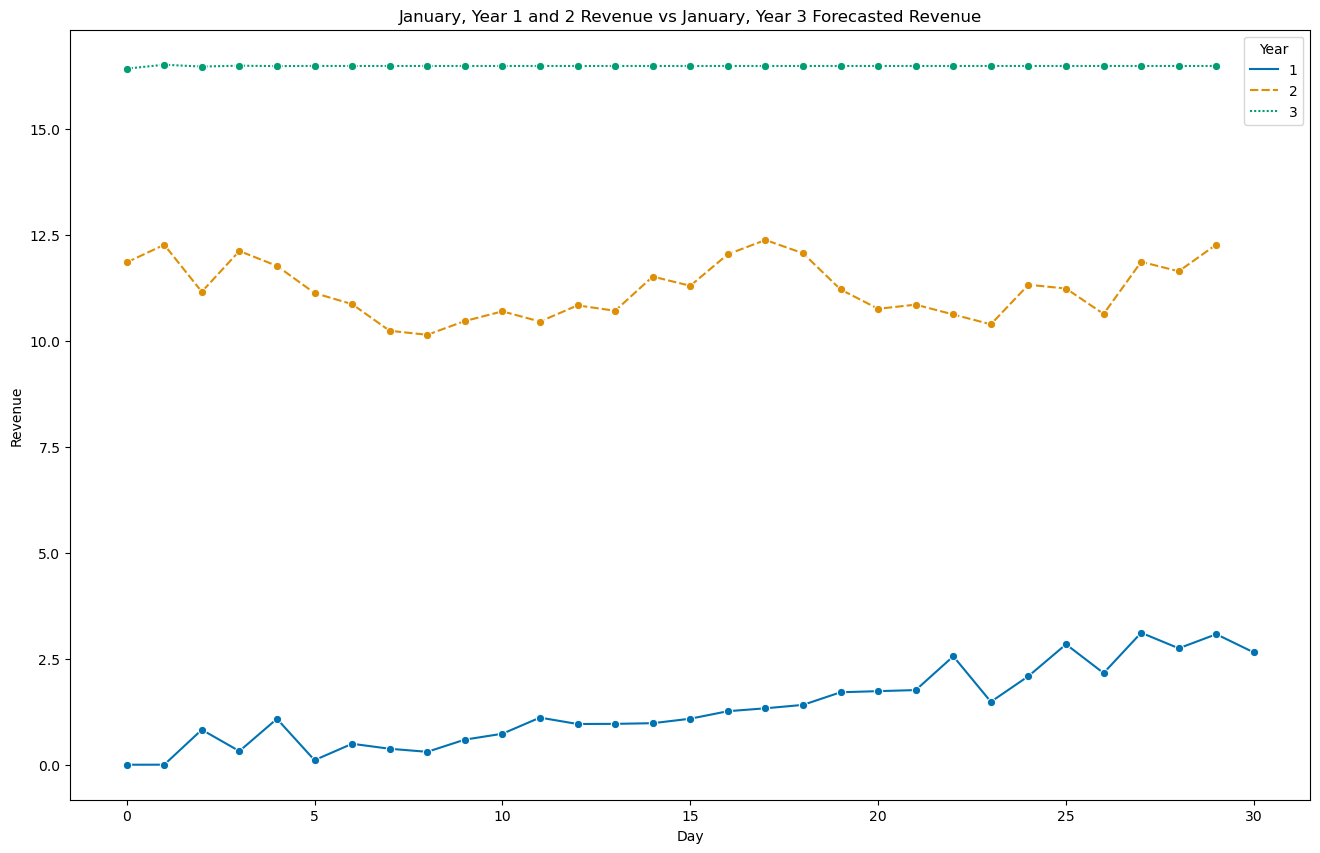

In [45]:
# Plot the predictions vs year 1 and 2
sns.lineplot(data=jan_df, marker='o')
plt.title('January, Year 1 and 2 Revenue vs January, Year 3 Forecasted Revenue')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend(title='Year')
plt.show()

In [46]:
# Get the annual sales revenue summary statistics
stats = jan_df.describe().drop('count')
stats

,1,2,3
mean,1.350632,11.227294,16.483823
std,0.930770,0.669059,0.013199
min,0.000000,10.143207,16.422010
25%,0.661383,10.699803,16.485259
50%,1.111586,11.185097,16.485260
75%,1.925452,11.830198,16.485261
max,3.113270,12.379342,16.514776


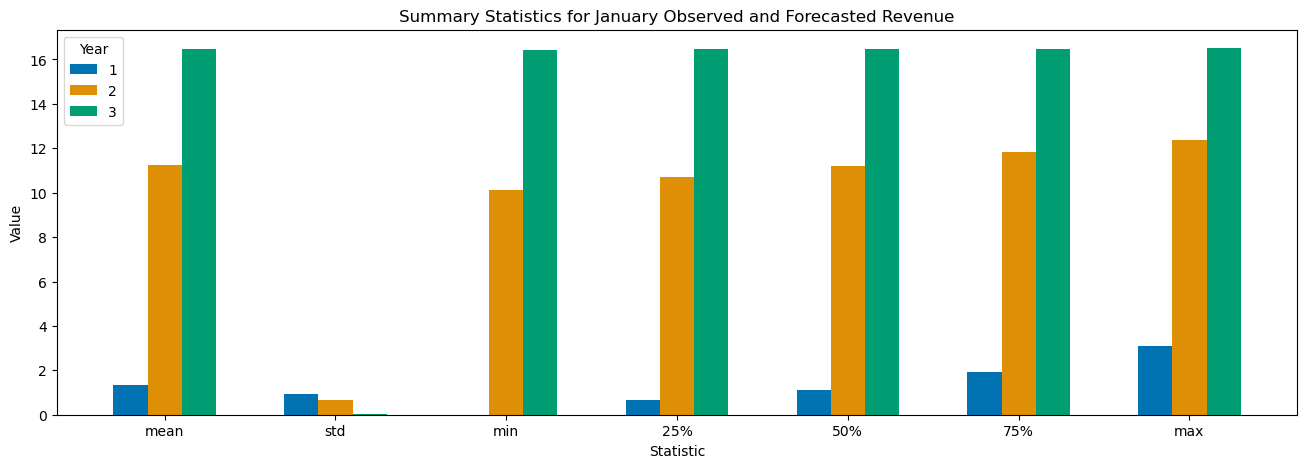

In [47]:
plt.rcParams['figure.figsize'] = [16,5]
# Visualize the summary statistics
x = np.arange(len(stats))
width = 0.2
plt.bar(x-width, stats['1'], width, label='1')
plt.bar(x, stats['2'], width, label='2')
plt.bar(x+width, stats['3'], width, label='3')
plt.title('Summary Statistics for January Observed and Forecasted Revenue')
plt.xticks(x, stats.index)
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.legend(title='Year')
plt.show()
plt.rcParams['figure.figsize'] = [16,10]

In [48]:
jan1 = round(jan_df['1'].sum(), 2)
jan2 = round(jan_df['2'].sum(), 2)
predicted = round(jan_df['3'].sum(), 2)

In [49]:
# Calculate the YoY observed and predicted growth
print('   January YoY Growth\n------------------------')
print('Year 2 Observed Revenue:', 
      round(((jan2 - jan1) / jan1)*100, 2).astype(str)+'%')

print('Year 3 Predicted Revenue:',
    round(((predicted - jan2) / jan2)*100, 2).astype(str)+'%')

   January YoY Growth
------------------------
Year 2 Observed Revenue: 704.44%
Year 3 Predicted Revenue: 46.82%


In [50]:
print(f'Year 2, Month 1 Observed Revenue: ${jan2} Million')
print(f'Year 3, Month 1 Predicted Revenue: ${predicted} Million')
print(f'Expected Revenue Increase: ${predicted - jan2} Million')

Year 2, Month 1 Observed Revenue: $336.82 Million
Year 3, Month 1 Predicted Revenue: $494.51 Million
Expected Revenue Increase: $157.69 Million


> Based on our forecast for January, Year 3, Teleco can expect to see an average increase in revenue of 46.82% from January, Year 2, a $157.69 Million increase in revenue.

## Thank You